In [ ]:
#hide
from topological_mott_insulator.core import *
# default_exp core
#export
import numpy as np
from nbdev.showdoc import show_doc
from nbdev.showdoc import *
import os
os.environ["OMP_NUM_THREADS"] = "18"
import checkerboard_lattice_plots as tools
from tqdm import tqdm 
from matplotlib import pyplot as plt
from matplotlib import transforms
from matplotlib.collections import LineCollection
import pickle
import time
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.interpolate import interp1d
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from scipy.optimize import brentq,newton
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Project name here

> Summary description here.

This file will become your README and also the index of your documentation.

## Install

`pip install your_project_name`

## How to use

Fill me in please! Don't forget code examples:

In [ ]:
nx, ny = 8, 8
stagg_m = 0
cf = (nx*ny)/(nx*ny)
t0=-1
jax, jay, jbx, jby = +0.5, -0.5, -0.5, +0.5
phix, phiy = 0., 0.

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=+0.5, jay=-0.5, 
		                        jbx=-0.5, jby=+0.5, v1=2.5, v2=1.5,
		                        beta=100000, cell_filling=cf, phix=0., phiy=0.)

re_mf = checkerboard_lattice_4unitcell(nx=nx,ny=ny,t0=-1,jax=+0.5, jay=-0.5, 
		                        jbx=-0.5, jby=+0.5, v1=2.5, v2=1.5,  
		                        beta=100000, cell_filling=cf)

for i1 in tqdm(range(0,200)):
        un_mf.iterate_mf(eta=0.6)
        re_mf.iterate_mf()

for i1 in tqdm(range(0,200)):
        un_mf.iterate_mf(eta=1.)
        re_mf.iterate_mf()

100%|██████████| 200/200 [00:08<00:00, 23.27it/s]


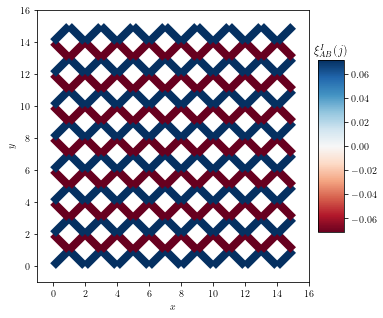

In [ ]:
un_mf_aux = un_mf
fig  = plt.figure()
gs0 = gridspec.GridSpec(1, 1, left=0.12, right=0.75, top=1., bottom=0., wspace=0)
gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0], hspace=0., wspace=0.)
ax = fig.add_subplot(gs00[0])

segment, color, mini, maxi = tools.plot_bonds(un_mf_aux.pos, un_mf_aux.J_nn, np.imag(un_mf_aux.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=8, rasterized=True)
 
ax.set_xlim(-1,2*un_mf_aux.nx)
ax.set_ylim(-1,2*un_mf_aux.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
cbar = fig.add_axes([0.77, 0.2, 0.06, 0.6])
fig.colorbar(ligne, cax=cbar)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')
plt.show()

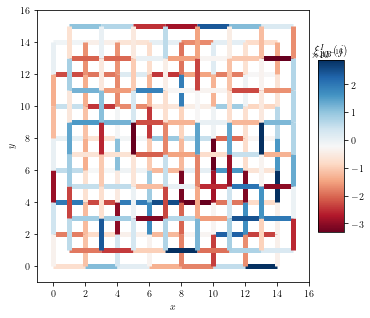

In [ ]:
fig  = plt.figure()
gs0 = gridspec.GridSpec(1, 1, left=0.12, right=0.75, top=1., bottom=0., wspace=0)
gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0], hspace=0., wspace=0.)
ax = fig.add_subplot(gs00[0])

segment, color, mini, maxi = tools.plot_bonds(un_mf.pos, un_mf.J_ax, np.imag(un_mf.mfhop_ax))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)
segment, color, mini, maxi = tools.plot_bonds(un_mf.pos, un_mf.J_ay, -np.imag(un_mf.mfhop_ay))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)

segment, color, mini, maxi = tools.plot_bonds(un_mf.pos, un_mf.J_bx, -np.imag(un_mf.mfhop_bx))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)

segment, color, mini, maxi = tools.plot_bonds(un_mf.pos, un_mf.J_by, np.imag(un_mf.mfhop_by))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=5, rasterized=True)
ax.add_collection(ligne)

ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
cbar = fig.add_axes([0.77, 0.2, 0.06, 0.6])
fig.colorbar(ligne, cax=cbar)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')
plt.show()

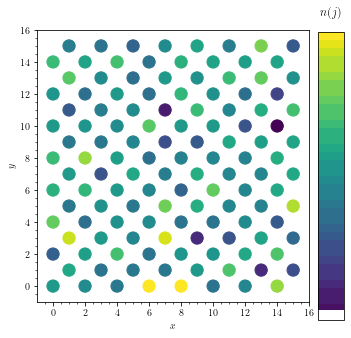

In [ ]:
fig  = plt.figure()
gs0 = gridspec.GridSpec(1, 1, left=0.12, right=0.75, top=1., bottom=0., wspace=0)
gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0], hspace=0., wspace=0.)
ax = fig.add_subplot(gs00[0])
#ax2 = fig.add_subplot(gs00[1])

sc = ax.scatter(un_mf.pos[:,0].flatten(),
                un_mf.pos[:,1].flatten(), c=np.real(un_mf.mfden),  s=150)
ax.set_aspect(aspect='equal')
ax.minorticks_on()
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
cbar = fig.add_axes([0.77, 0., 0.06, 1.])
cb1 = fig.colorbar(sc, cax=cbar, orientation='vertical')
plt.title(r'$n(j)$')
plt.show()